<h1> Most Frequent Ingredients - Heatmap Visualization

<h4>Cookbooks

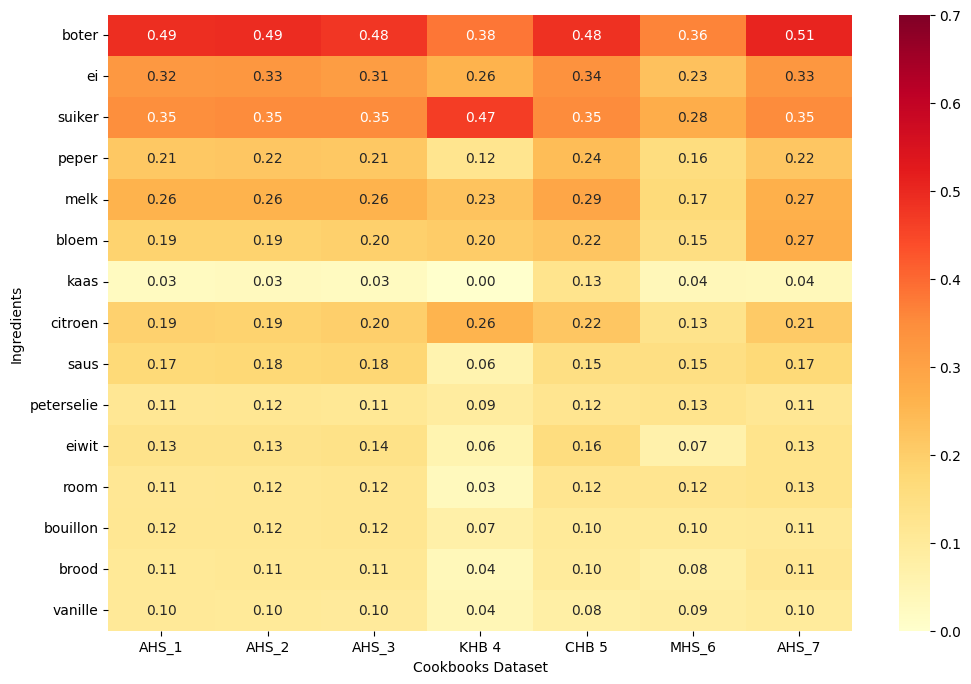

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cookbooks dataset
df = pd.read_csv('relative_ingredient_frequency_cookbooks.csv')  

df.rename(columns={df.columns[0]: 'ingredient'}, inplace=True)

# Excluding 'zout' that is salt and 'water' from the calculations
df = df[~df['ingredient'].isin(['zout', 'water'])]

decade_columns = [col for col in df.columns if col != 'ingredient']
decades = [col.split('-')[0] for col in decade_columns]

df.set_index('ingredient', inplace=True)

# Defining the 10 top ingredients from both datasets
manual_top_10 = ['boter','ei','suiker','peper','melk','bloem','kaas','citroen', 'saus','peterselie']

df['total_frequency'] = df[decade_columns].sum(axis=1)

# Excluding top 10 and finding the next top 5 ingredients for this dataset
remaining_df = df.drop(index=manual_top_10, errors='ignore')
next_top_5 = remaining_df.nlargest(5, 'total_frequency').index.tolist()

final_top_ingredients = manual_top_10 + next_top_5

heatmap_data = df.loc[final_top_ingredients, decade_columns]

# Heatmap visualization
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", 
                 vmin=0, vmax=0.7,  # Setting legend color scale from 0 to 0.7 to maintain uniformity
                 yticklabels=final_top_ingredients, xticklabels=decade_columns)

plt.rcParams.update({'font.size': 13})
plt.xlabel('Cookbooks Dataset')
plt.ylabel('Ingredients')
plt.savefig('Heatmap_cookbooks.png')
plt.show()


<h4> Historical Recipe Web

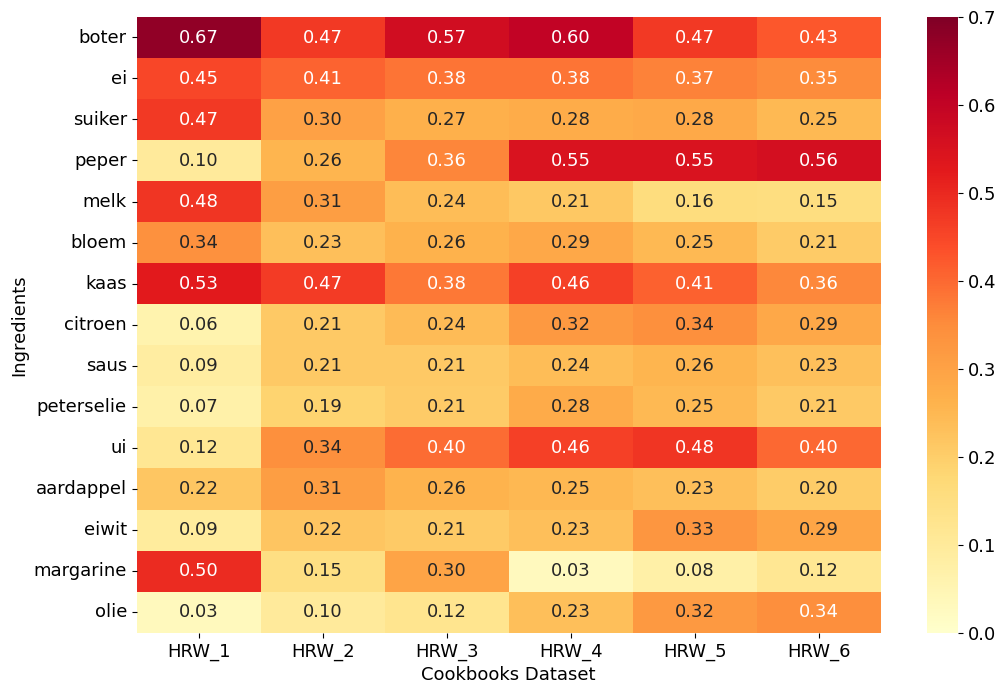

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# HRW dataset
df = pd.read_csv('relative_ingredient_frequency_HRW.csv')

df.rename(columns={df.columns[0]: 'ingredient'}, inplace=True)

# Excluding 'zout' that is salt and 'water' from the calculations
df = df[~df['ingredient'].isin(['zout', 'water'])]

decade_columns = [col for col in df.columns if col != 'ingredient']
decades = [col.split('-')[0] for col in decade_columns]

df.set_index('ingredient', inplace=True)

# Defining the 10 top ingredients from both datasets
manual_top_10 = ['boter','ei','suiker','peper','melk','bloem','kaas','citroen', 'saus','peterselie']

df['total_frequency'] = df[decade_columns].sum(axis=1)

# Excluding top 10 and finding the next top 5 ingredients for this dataset
remaining_df = df.drop(index=manual_top_10, errors='ignore')
next_top_5 = remaining_df.nlargest(5, 'total_frequency').index.tolist()

final_top_ingredients = manual_top_10 + next_top_5

heatmap_data = df.loc[final_top_ingredients, decade_columns]

# Heatmap visualization
plt.figure(figsize=(12, 8))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlOrRd", 
                 vmin=0, vmax=0.7,  # Setting legend color scale from 0 to 0.7 to maintain uniformity
                 yticklabels=final_top_ingredients, xticklabels=decade_columns)

plt.rcParams.update({'font.size': 13})
plt.xlabel('Cookbooks Dataset')
plt.ylabel('Ingredients')
plt.savefig('Heatmap_HRW.png')
plt.show()
